## Preliminary

First import the data

In [2]:
%matplotlib inline
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

Load the data

In [3]:
f = open('data1dbig.mat','rb')
data = loadmat(f)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

N_train = x_train.shape[0]
N_test = x_test.shape[0]

print(x_train.shape)
print(N_train, N_test)

(140, 1)
140 60


Plot the data to visualize the structure of data

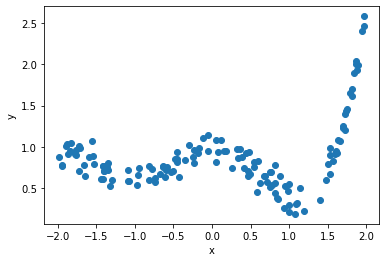

In [4]:
plt.scatter(x_train, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Cost function

Append $x_0 = 1$ to all the data points in the design matrix.

Make sure the shape corresponds to (m, n) with m being the number of data points and n the number of features.

In [5]:
print("Before:", x_train.shape)
X_train = np.hstack((np.ones((N_train, 1)), x_train))
print("After:", X_train.shape)

Before: (140, 1)
After: (140, 2)


In [6]:
print("Before:", x_test.shape)
X_test = np.hstack((np.ones((N_test,1)), x_test))
print("After:", X_test.shape)

Before: (60, 1)
After: (60, 2)


Define the cost function of linear regression as the mean square error (MSE).

In [7]:
def cost(theta, X, y):
    y_pred = X.dot(theta)  # predictions = X times theta
    err_sq = (y_pred - y) ** 2
    return np.mean(err_sq)

In [8]:
theta0 = [.3, .1]
cost(theta0, X_train, y_train)

0.507848786816897

## Compute the analytical solution

Perform linear regression with the analytical solution

In [9]:
from numpy.linalg import pinv

In [10]:
theta_star = pinv(X_train).dot(y_train)
cost(theta_star, X_train, y_train)

0.15499440430945832

Compute the cost on the testing set

In [11]:
cost(theta_star, X_test, y_test)

0.14423851163591156

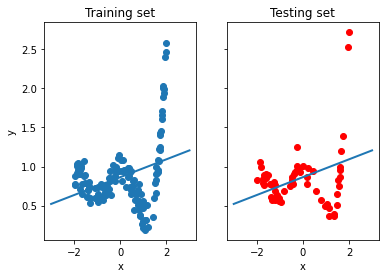

In [12]:
fig, ax = plt.subplots(1, 2, sharey=True)

xx = np.linspace(-3,3, 100)
XX = np.array([np.ones(100), xx]).T
yy = XX.dot(theta_star)

ax[0].scatter(x_train, y_train)
ax[0].plot(xx, yy, lw=2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Training set')

ax[1].scatter(x_test, y_test, color='red')
ax[1].plot(xx, yy, lw=2)
ax[1].set_xlabel('x')
ax[1].set_title('Testing set')

plt.show()

## Polynomial regression

Just expand the data once more

In [13]:
X_train = np.hstack((np.ones((N_train, 1)), x_train, x_train ** 2))
X_test = np.hstack((np.ones((N_test, 1)), x_test, x_test ** 2))

In [14]:
theta0 = [.3, .5, .2]
cost(theta0, X_train, y_train)

0.6705895193406664

In [15]:
theta_star = pinv(X_train).dot(y_train)
print(cost(theta_star, X_train, y_train))
print(cost(theta_star, X_test, y_test))

0.10722429512834064
0.1297628471189144


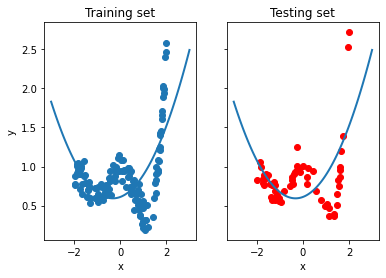

In [16]:
fig, ax = plt.subplots(1,2, sharey=True)

xx = np.linspace(-3, 3, 100)
XX = np.array([np.ones(100), xx, xx ** 2]).T
yy = XX.dot(theta_star)

ax[0].scatter(x_train, y_train)
ax[0].plot(xx, yy, lw=2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Training set')

ax[1].scatter(x_test, y_test, color='red')
ax[1].plot(xx, yy, lw=2)
ax[1].set_xlabel('x')
ax[1].set_title('Testing set')

plt.show()

## Varying degree of polynomial fit

theta_star:  [ 0.98089591  0.01603167 -0.89126345 -0.19661264  0.44813077  0.07782147
 -0.04434642]
Cost for theta_star train: 0.010387955557447768
Cost for theta_star test: 0.0078098615804223165


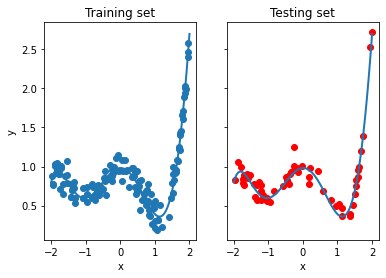

In [17]:
polynomial_degree = 6

xx = np.linspace(-2, 2, 100)

x_train_stack = []
x_test_stack = []
xx_stack = []
for i in range(polynomial_degree + 1):
    x_train_stack.append(x_train ** i)
    x_test_stack.append(x_test ** i)
    xx_stack.append(xx ** i)
X_train = np.hstack(x_train_stack)
X_test = np.hstack(x_test_stack)

theta_star = pinv(X_train).dot(y_train)
print("theta_star: ", theta_star.ravel())
print("Cost for theta_star train:", cost(theta_star, X_train, y_train))
print("Cost for theta_star test:", cost(theta_star, X_test, y_test))

fig, ax = plt.subplots(1,2, sharey=True)


XX = np.array(xx_stack).T
yy = XX.dot(theta_star)

ax[0].scatter(x_train, y_train)
ax[0].plot(xx, yy, lw=2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Training set')

ax[1].scatter(x_test, y_test, color='red')
ax[1].plot(xx, yy, lw=2)
ax[1].set_xlabel('x')
ax[1].set_title('Testing set')

plt.show()

## Linear regression with non-linear features

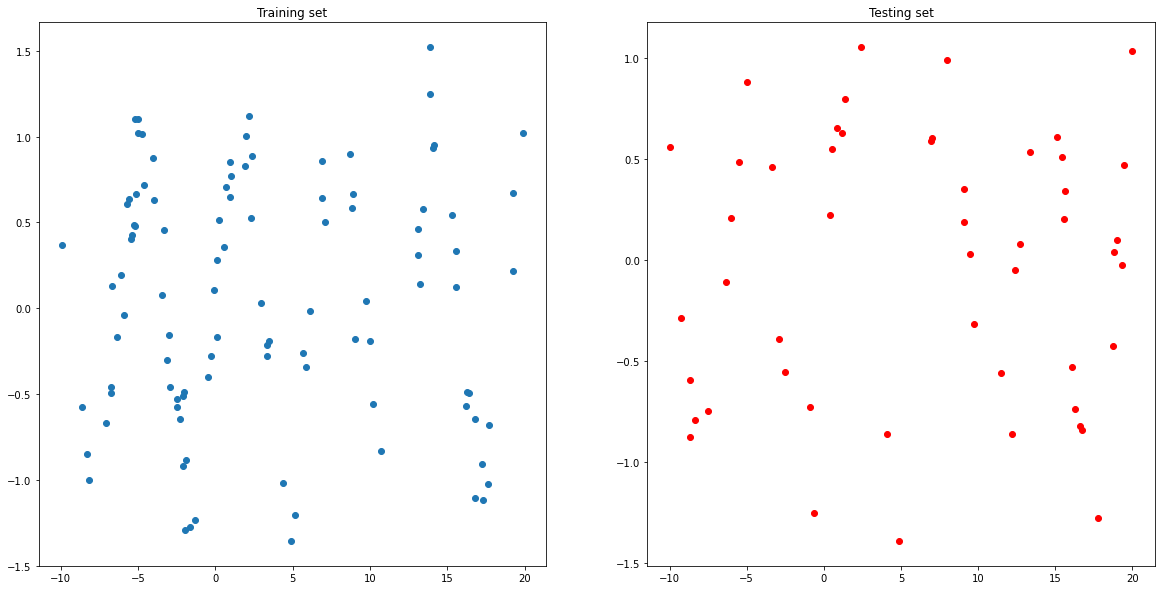

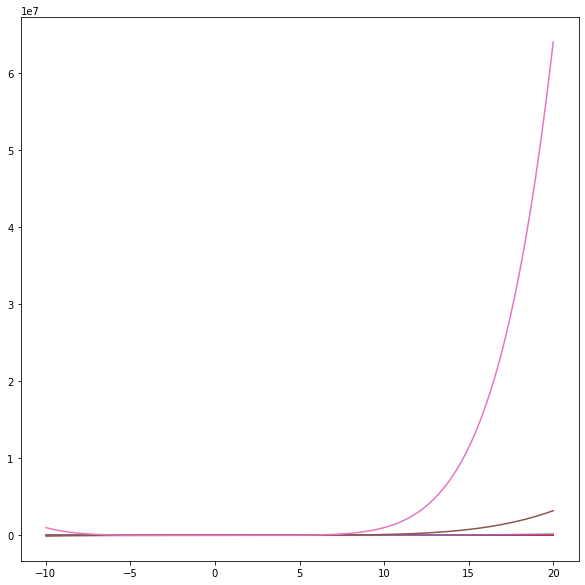

theta_star:  [-1.64881213e-02 -8.22969475e-02  4.50553001e-03  2.86853704e-03
 -1.02958149e-04 -1.69799531e-05  7.59241953e-07]
Cost for theta_star: 0.4430526173297657


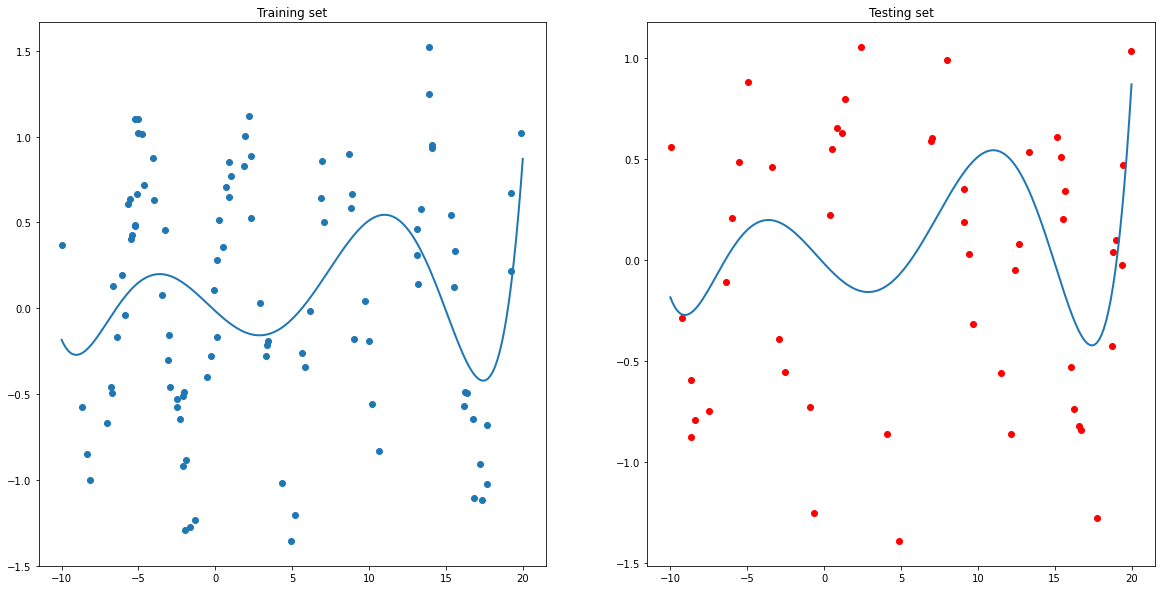

In [26]:
n_train = 100
n_test = 50
x_min = -10
x_max = 20
noise_amp = 0.2
fn = np.sin
n_basis_fns = 6 # 6  # Change me to see the difference!
 
x_train = np.random.uniform(x_min, x_max, n_train).reshape(n_train, 1)
y_train = fn(x_train) + np.random.normal(0, noise_amp, (n_train, 1))

x_test = np.random.uniform(x_min, x_max, n_test).reshape(n_test, 1)
y_test = fn(x_test) + np.random.normal(0, noise_amp, (n_test, 1))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].scatter(x_train, y_train)
ax[0].set_title('Training set')

ax[1].scatter(x_test, y_test, color='red')
ax[1].set_title('Testing set')

plt.show()

## Polynomial basis functions
basis_functions = [
    lambda x: x ** 0,
    lambda x: x ** 1,
    lambda x: x ** 2,
    lambda x: x ** 3,
    lambda x: x ** 4,
    lambda x: x ** 5,
    lambda x: x ** 6,
]

xx = np.linspace(x_min, x_max, 200)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
x_train_stack = []
x_test_stack = []
xx_stack = []
for i in range(n_basis_fns + 1):
    x_train_stack.append(basis_functions[i](x_train))
    x_test_stack.append(basis_functions[i](x_test))
    xx_stack.append(basis_functions[i](xx))
    plt.plot(xx, basis_functions[i](xx))
X_train = np.hstack(x_train_stack)
X_test = np.hstack(x_test_stack)
plt.show()

# print(X_train.shape, X_test.shape)
theta_star = pinv(X_train).dot(y_train)
print("theta_star: ", theta_star.ravel())
print("Cost for theta_star:", cost(theta_star, X_train, y_train))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

XX = np.array(xx_stack).T
yy = XX.dot(theta_star)

ax[0].scatter(x_train, y_train)
ax[0].plot(xx, yy, lw=2)
ax[0].set_title('Training set')

ax[1].scatter(x_test, y_test, color='red')
ax[1].plot(xx, yy, lw=2)
ax[1].set_title('Testing set')

plt.show()

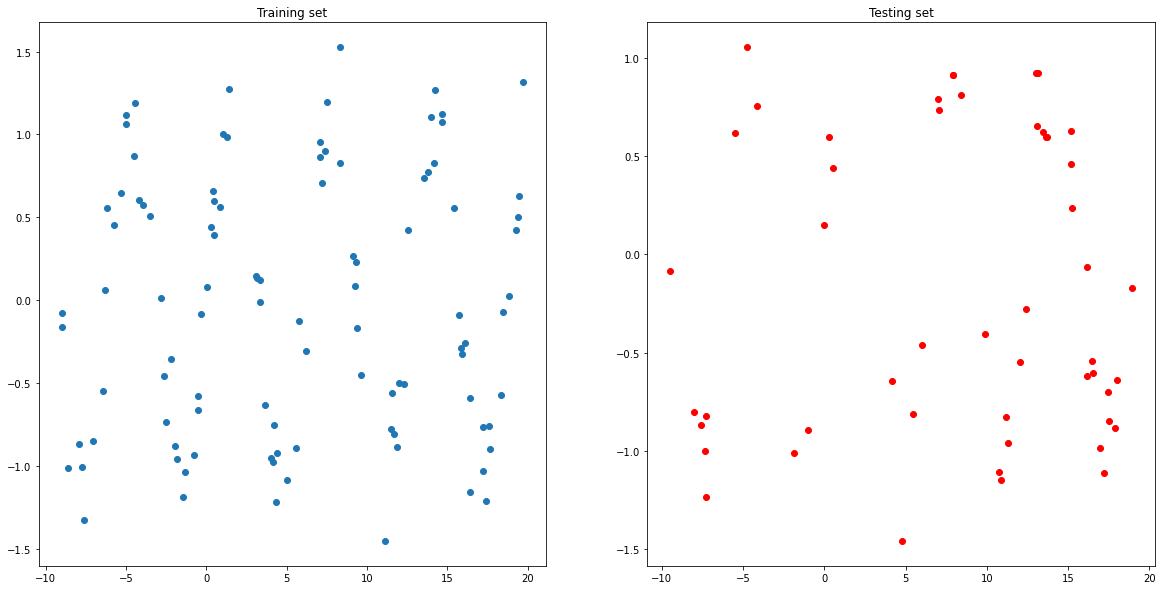

IndexError: list index out of range

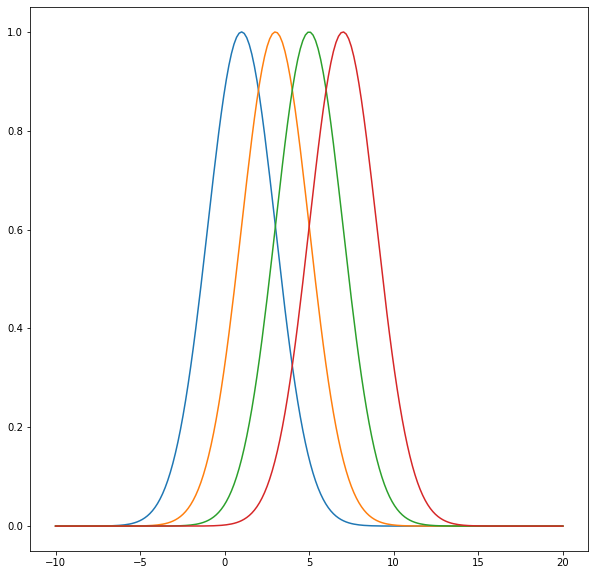

In [31]:
n_train = 100
n_test = 50
x_min = -10
x_max = 20
noise_amp = 0.2
fn = np.sin
n_basis_fns = 3 # 4 # Change me to see the difference PLUS uncomment the last basis function!

x_train = np.random.uniform(x_min, x_max, n_train).reshape(n_train, 1)
y_train = fn(x_train) + np.random.normal(0, noise_amp, (n_train, 1))

x_test = np.random.uniform(x_min, x_max, n_test).reshape(n_test, 1)
y_test = fn(x_test) + np.random.normal(0, noise_amp, (n_test, 1))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].scatter(x_train, y_train)
ax[0].set_title('Training set')

ax[1].scatter(x_test, y_test, color='red')
ax[1].set_title('Testing set')

plt.show()

## Radial Basis Functions

sigma = 2.
basis_functions = [
    lambda x: np.exp(-((x - 1) ** 2) / (2 * sigma ** 2)),
    lambda x: np.exp(-((x - 3) ** 2) / (2 * sigma ** 2)),
    lambda x: np.exp(-((x - 5) ** 2) / (2 * sigma ** 2)),
    lambda x: np.exp(-((x - 7) ** 2) / (2 * sigma ** 2)),
#     lambda x: np.sin(x),
]

xx = np.linspace(x_min, x_max, 200)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
x_train_stack = []
x_test_stack = []
xx_stack = []
for i in range(n_basis_fns + 1):
    x_train_stack.append(basis_functions[i](x_train))
    x_test_stack.append(basis_functions[i](x_test))
    xx_stack.append(basis_functions[i](xx))
    plt.plot(xx, basis_functions[i](xx))
X_train = np.hstack(x_train_stack)
X_test = np.hstack(x_test_stack)
plt.show()

# print(X_train.shape, X_test.shape)
theta_star = pinv(X_train).dot(y_train)
print("theta_star: ", theta_star.ravel())
print("Cost for theta_star:", cost(theta_star, X_train, y_train))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

XX = np.array(xx_stack).T
yy = XX.dot(theta_star)

ax[0].scatter(x_train, y_train)
ax[0].plot(xx, yy, lw=2)
ax[0].set_title('Training set')

ax[1].scatter(x_test, y_test, color='red')
ax[1].plot(xx, yy, lw=2)
ax[1].set_title('Testing set')

plt.show()